In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tic_env import *

### Question 1

In [2]:
Turns = np.array(['X','O'])
player1 = QPlayer(epsilon=0.1, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env1 = QlearningEnv(player1=player1, player2=player2)
env1.train(20000)

Text(0, 0.5, 'avg reward')

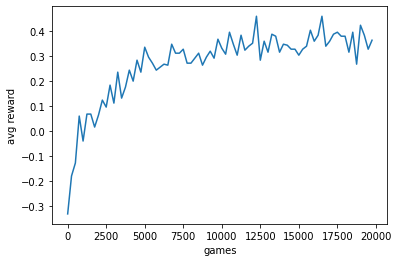

In [3]:
length1=250
lst1 = env1.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)
avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)
plt.plot(x_ticks, avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

### Question 2

In [4]:
Turns = np.array(['X','O'])
training_reward_lists = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env2 = QlearningEnv(player1=player1, player2=player2)
    env2.set_decay_eps(epoch_star=epoch_star)
    env2.train(20000)
    training_reward_lists.append(env2.get_reward(player=1))

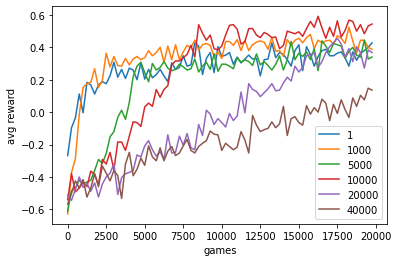

In [5]:
length1=250
x_ticks = range(0, len(training_reward_lists[0]), length1)
for j in range(len(epoch_stars)):
    avg_reward1 = []
    for i in range(len(training_reward_lists[0])//length1):
        avg_reward1.append(sum(training_reward_lists[j][i*length1:(i+1)*length1])/length1)
    plt.plot(x_ticks, avg_reward1, label=str(epoch_stars[j]))
    plt.xlabel(f'games')
    plt.ylabel('avg reward')
plt.legend()

### Question 3

In [6]:
Turns = np.array(['X','O'])
test_reward_lists_random_3 = []
test_reward_lists_optimal_3 = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_3.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_3.append(env3.test_avg_reward['optimal'])

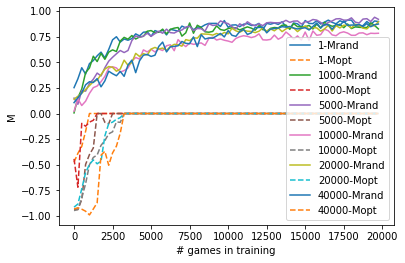

In [13]:
# M_rand
plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_3[j], linestyle='-', label=str(epoch_stars[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_3[j], linestyle='--', label=str(epoch_stars[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 4

In [3]:
Turns = np.array(['X','O'])
best_epoch_star = 20000
test_reward_lists_random_4 = []
test_reward_lists_optimal_4 = []
opt_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
for opt_eps in opt_epses:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=opt_eps, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=best_epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_4.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_4.append(env3.test_avg_reward['optimal'])

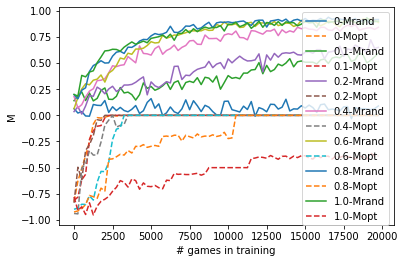

In [5]:
plt.figure()
for j in range(len(opt_epses)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_4[j], linestyle='-', label=str(opt_epses[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_4[j], linestyle='--', label=str(opt_epses[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 5

In [11]:
print(max([max(it) for it in test_reward_lists_random_4]))
print(max([max(it) for it in test_reward_lists_optimal_4]))

0.938
0.0


### Question 6
in report

### Question 7

In [16]:
Turns = np.array(['X','O'])
test_reward_lists_random_7 = []
test_reward_lists_optimal_7 = []
train_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
for train_eps in train_epses:
    player1 = QPlayer(epsilon=train_eps, player=Turns[0])
    player2 = QPlayer(epsilon=train_eps, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_7.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_7.append(env3.test_avg_reward['optimal'])

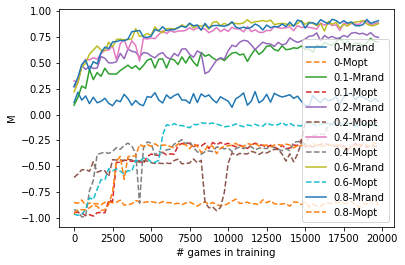

In [20]:
plt.figure()
for j in range(len(train_epses)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_7[j], linestyle='-', label=str(train_epses[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_7[j], linestyle='--', label=str(train_epses[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 8

In [21]:
Turns = np.array(['X','O'])
test_reward_lists_random_8 = []
test_reward_lists_optimal_8 = []
best_train_eps = 0.6 ## no effect, since we use set_decay_eps
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=best_train_eps, player=Turns[0])
    player2 = QPlayer(epsilon=best_train_eps, player=Turns[1])
    env8 = QlearningEnv(player1=player1, player2=player2)
    env8.set_decay_eps(epoch_star=epoch_star)
    env8.set_testing()
    env8.train(20000)
    test_reward_lists_random_8.append(env8.test_avg_reward['random'])
    test_reward_lists_optimal_8.append(env8.test_avg_reward['optimal'])

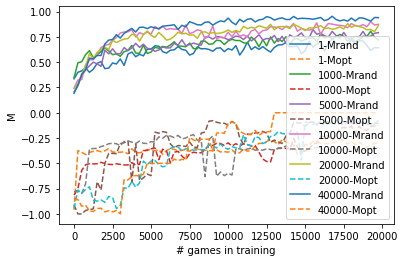

In [23]:
plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_8[j], linestyle='-', label=str(epoch_stars[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_8[j], linestyle='--', label=str(epoch_stars[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 9

In [17]:
print(max([max(it) for it in test_reward_lists_random_8]))
print(max([max(it) for it in test_reward_lists_optimal_8]))

0.95
-0.074


### Question 10

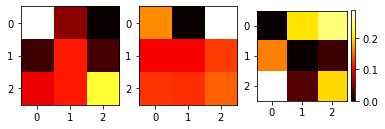

In [32]:
test_env = env8
test_env.reset_all()
def render_Q(grid):
    state = test_env.player1.toState(grid)
    moves = test_env.player1.empty(grid) # use method from Player class
    Q_show = np.zeros((3,3))
    for move in moves:
        Q_show[move] = test_env.Q['Q'][state][move]
    return Q_show

grid1 = np.zeros((3,3))
grid2 = np.zeros((3,3))
grid3 = np.zeros((3,3))

grid2[(1,1)] = 1
grid3[(0,0)] = 1
grid3[(1,1)] = -1

Q_show1 = render_Q(grid1)
Q_show2 = render_Q(grid2)
Q_show3 = render_Q(grid3)


plt.subplot(1, 3, 1)
plt.imshow(Q_show1, cmap='hot')
plt.subplot(1, 3, 2)
plt.imshow(Q_show2, cmap='hot')
plt.subplot(1, 3, 3)
plt.imshow(Q_show3, cmap='hot')

plt.colorbar(fraction=0.046, pad=0.04)
plt.show()



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tic_env import *

### Qustion 11

#### Check DQN Implementation (Against Opt(0.5))

In [36]:
Turns = np.array(['X','O'])

player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env1 = DQNlearningEnv(player1=player1, player2=player2)
env1.train(20000)

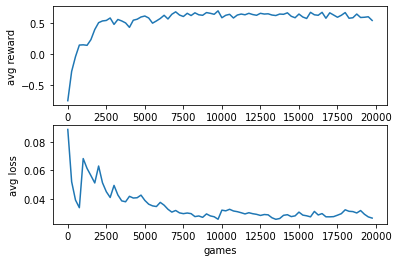

In [3]:
import matplotlib.pyplot as plt
length1=250
lst1 = env1.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)

avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,1)
plt.plot(list(x_ticks), avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

lst2 = env1.losses
x_ticks2 = range(0, len(lst2), length1)

avg_loss = []
for i in range(len(lst2)//length1):
    avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,2)
plt.plot(list(x_ticks2), avg_loss)
plt.xlabel(f'games')
plt.ylabel('avg loss')

# plt.savefig('./img/q11.png')



#### Compute average loss and reward with serveral fixed epsilons

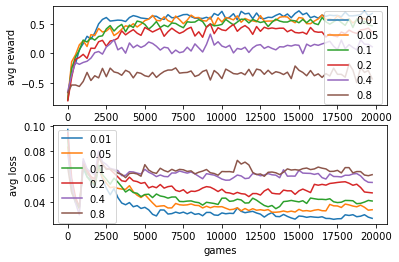

In [30]:
Turns = np.array(['X','O'])
length1=250
epsilon_list = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
# epsilon_list = [0.01, 0.05]
for e in range(len(epsilon_list)):
    player1 = DQNPlayer(epsilon=epsilon_list[e], player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env1 = DQNlearningEnv(player1=player1, player2=player2)
    env1.train(20000)

    length1=250
    lst1 = env1.get_reward(player=1)
    x_ticks = range(0, len(lst1), length1)

    avg_reward1 = []
    for i in range(len(lst1)//length1):
        avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

    plt.subplot(2,1,1)
    plt.plot(list(x_ticks), avg_reward1, label= str(epsilon_list[e]))
    plt.xlabel(f'games')
    plt.ylabel('avg reward')
    plt.legend()

    lst2 = env1.losses
    x_ticks2 = range(0, len(lst2), length1)

    avg_loss = []
    for i in range(len(lst2)//length1):
        avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

    plt.subplot(2,1,2)
    plt.plot(list(x_ticks2), avg_loss, label= str(epsilon_list[e]))
    plt.xlabel(f'games')
    plt.ylabel('avg loss')
    plt.legend()

plt.savefig("./img/q11_multi.png")


#### Compute Mrand and Mopt with several fixed epsilons

In [34]:
# For compute Mrand and Mopt
Turns = np.array(['X','O'])
test_reward_lists_random_1 = []
test_reward_lists_optimal_1 = []

for e in range(len(epsilon_list)):
    player1 = DQNPlayer(epsilon=epsilon_list[e], player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env1 = DQNlearningEnv(player1=player1, player2=player2)
    env1.set_testing()
    env1.train(20000)
    test_reward_lists_random_1.append(env1.test_avg_reward['random'])
    test_reward_lists_optimal_1.append(env1.test_avg_reward['optimal'])
    

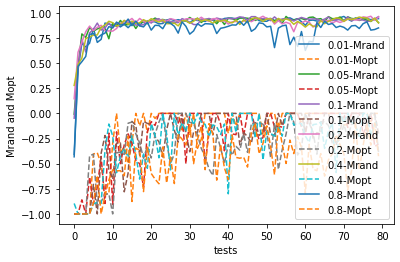

In [35]:

for j in range(len(epsilon_list)):
    plt.plot(test_reward_lists_random_1[j], label= str(epsilon_list[j]) + str("-Mrand"))
    plt.plot(test_reward_lists_optimal_1[j], label= str(epsilon_list[j]) + str("-Mopt"), linestyle="--")
plt.xlabel(f'tests')
plt.ylabel('Mrand and Mopt')
plt.legend()
plt.savefig("./img/q13_fixed_multi.png")

### Question 12

In [4]:
Turns = np.array(['X','O'])
player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env2 = DQNlearningEnv(player1=player1, player2=player2)
env2.set_batch_one()
env2.train(20000)

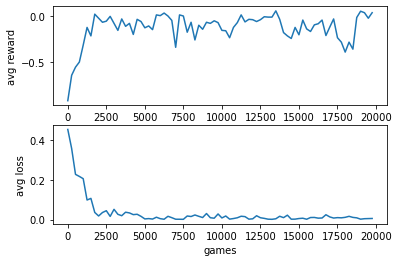

In [5]:
import matplotlib.pyplot as plt
length1=250
lst1 = env2.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)

avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

lst2 = env2.losses
x_ticks2 = range(0, len(lst2), length1)

avg_loss = []
for i in range(len(lst2)//length1):
    avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,1)
plt.plot(list(x_ticks), avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

plt.subplot(2,1,2)
plt.plot(list(x_ticks2), avg_loss)
plt.xlabel(f'games')
plt.ylabel('avg loss')

plt.savefig('./img/q12.png')

### Question 13

In [6]:
Turns = np.array(['X','O'])
test_reward_lists_random_3 = []
test_reward_lists_optimal_3 = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
# epoch_stars = [1]
for epoch_star in epoch_stars:
    player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = DQNlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_3.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_3.append(env3.test_avg_reward['optimal'])

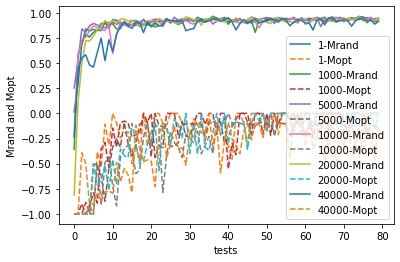

In [13]:
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_random_3[j], label= str(epoch_stars[j]) + str("-Mrand"))
    plt.plot(test_reward_lists_optimal_3[j], label= str(epoch_stars[j]) + str("-Mopt"), linestyle="--")
plt.xlabel(f'tests')
plt.ylabel('Mrand and Mopt')
plt.legend()
plt.savefig("./img/q13.jpg")

### Question 14

In [2]:
Turns = np.array(['X','O'])
best_epoch_star = 20000
test_reward_lists_random_14 = []
test_reward_lists_optimal_14 = []
opt_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
for opt_eps in opt_epses:
    player1 = DQNPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=opt_eps, player=Turns[1])
    env3 = DQNlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=best_epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_14.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_14.append(env3.test_avg_reward['optimal'])

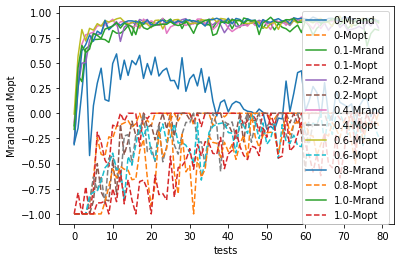

In [4]:
# M_rand
plt.figure()
for j in range(len(opt_epses)):
    plt.plot(test_reward_lists_random_14[j], label=str(opt_epses[j]) + str('-Mrand'))
    plt.plot(test_reward_lists_optimal_14[j], label=str(opt_epses[j]) + str("-Mopt"), linestyle="--")
    plt.xlabel(f'tests')
    plt.ylabel('Mrand and Mopt')
plt.legend()
plt.savefig("./img/q14.jpg")

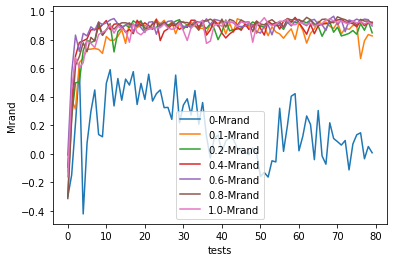

In [8]:
for j in range(len(opt_epses)):
    plt.plot(test_reward_lists_random_14[j], label=str(opt_epses[j]) + str('-Mrand'))
    plt.xlabel(f'tests')
    plt.ylabel('Mrand')
plt.legend()

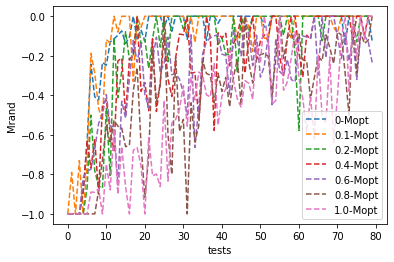

In [9]:
for j in range(len(opt_epses)):
    plt.plot(test_reward_lists_optimal_14[j], label=str(opt_epses[j]) + str("-Mopt"), linestyle="--")
    plt.xlabel(f'tests')
    plt.ylabel('Mrand')
plt.legend()

### Question 15

In [5]:
highest_reward_random = max(max(test_reward_lists_random_14))
highest_reward_random

0.964

In [6]:
highest_reward_opt = max(max(test_reward_lists_optimal_14))
highest_reward_opt
####finish

0.0

### Question 16

In [2]:
Turns = np.array(['X','O'])
test_reward_lists_random_16 = []
test_reward_lists_optimal_16 = []
train_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
for train_eps in train_epses:
    player1 = DQNPlayer(epsilon=train_eps, player=Turns[0])
    player2 = DQNPlayer(epsilon=train_eps, player=Turns[1])
    env16 = DQNlearningEnv(player1=player1, player2=player2)
    env16.set_testing()
    env16.train(20000)
    test_reward_lists_random_16.append(env16.test_avg_reward['random'])
    test_reward_lists_optimal_16.append(env16.test_avg_reward['optimal'])

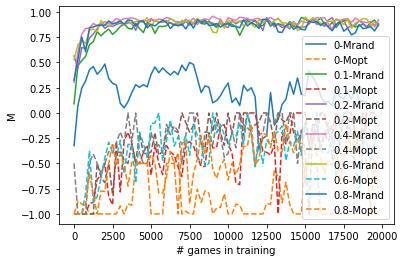

In [5]:
plt.figure()
for j in range(len(train_epses)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_16[j], linestyle='-', label=str(train_epses[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_16[j], linestyle='--', label=str(train_epses[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 17

In [3]:
Turns = np.array(['X','O'])
test_reward_lists_random_17 = []
test_reward_lists_optimal_17 = []
best_train_eps = 0.6 ## no effect, since we use set_decay_eps
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = DQNPlayer(epsilon=best_train_eps, player=Turns[0])
    player2 = DQNPlayer(epsilon=best_train_eps, player=Turns[1])
    env17 = DQNlearningEnv(player1=player1, player2=player2)
    env17.set_decay_eps(epoch_star=epoch_star)
    env17.set_testing()
    env17.train(20000)
    test_reward_lists_random_17.append(env17.test_avg_reward['random'])
    test_reward_lists_optimal_17.append(env17.test_avg_reward['optimal'])

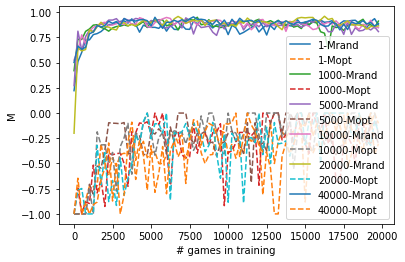

In [6]:
plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_17[j], linestyle='-', label=str(epoch_stars[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_17[j], linestyle='--', label=str(epoch_stars[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 18

In [18]:
print(max([max(it) for it in test_reward_lists_random_17]))
print(max([max(it) for it in test_reward_lists_optimal_17]))

0.96
0.0


### Question 19

In [4]:
Turns = np.array(['X','O'])
player1 = DQNPlayer(epsilon=0.6, player=Turns[0])
player2 = DQNPlayer(epsilon=0.6, player=Turns[1])
env19 = DQNlearningEnv(player1=player1, player2=player2)
env19.set_decay_eps(epoch_star=10000)
env19.set_testing()
env19.train(20000)

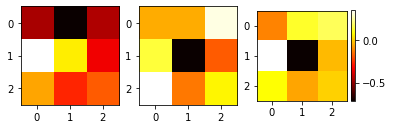

In [14]:
test_env = env19
test_env.reset_all()
def render_Q(grid, player="X"):
    moves = test_env.player1.empty(np.zeros((3,3))) # use method from Player class
    Q_show = np.zeros((3,3))
    for move in moves:
        Q_value = test_env.policy_net(grid2state(grid, player).to(test_env.device))
        Q_show[move] = Q_value[(0,pos_to_a(move))].item()
    return Q_show

grid1 = np.zeros((3,3))
grid2 = np.zeros((3,3))
grid3 = np.zeros((3,3))

grid2[(1,1)] = 1
grid3[(0,0)] = 1
grid3[(1,1)] = -1

Q_show1 = render_Q(grid1, player="X")
Q_show2 = render_Q(grid2, player="O")
Q_show3 = render_Q(grid3, player="X")


plt.subplot(1, 3, 1)
plt.imshow(Q_show1, cmap='hot')
plt.subplot(1, 3, 2)
plt.imshow(Q_show2, cmap='hot')
plt.subplot(1, 3, 3)
plt.imshow(Q_show3, cmap='hot')

plt.colorbar(fraction=0.046, pad=0.04)
plt.show()
